In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/test/Datasets/FashionMNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/test/Datasets/FashionMNIST',train=False, download=True, transform=transforms.ToTensor())

In [3]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False, num_workers=2)

In [4]:
import numpy as np
num_inputs = 784
num_outputs = 10

w = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)# 权重的高斯随机初始化
b = torch.zeros(num_outputs, requires_grad=True)                             # 偏移的随机初始化

In [5]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [6]:
def net(X):
    return softmax(torch.mm(X.view(-1, num_inputs), w) + b)

In [7]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))

In [8]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [9]:
lr = 0.03
num_epochs = 80
net = net
loss = cross_entropy
loss_list = []
epoch_list = []
for epoch in range(0,num_epochs):
    for X,y in train_iter:
        l = loss(net(X),y).sum()
        #sgd([w,b],lr,batch_size)
        l.backward()
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(X), y)
    epoch_list.append(epoch)
    loss_list.append(train_l.mean().item())
    print('epoch %d, loss %f' % (epoch, train_l.mean().item()))#第一次训练后全部训练集的损失的均值 

epoch 0, loss 0.834459
epoch 1, loss 0.725173
epoch 2, loss 0.741018
epoch 3, loss 0.478732
epoch 4, loss 0.625841
epoch 5, loss 0.541773
epoch 6, loss 0.469326
epoch 7, loss 0.475774
epoch 8, loss 0.544209
epoch 9, loss 0.641391
epoch 10, loss 0.553903
epoch 11, loss 0.450143
epoch 12, loss 0.565342
epoch 13, loss 0.497521
epoch 14, loss 0.444724
epoch 15, loss 0.454046
epoch 16, loss 0.391821
epoch 17, loss 0.515436
epoch 18, loss 0.428535
epoch 19, loss 0.425361
epoch 20, loss 0.503010
epoch 21, loss 0.312132
epoch 22, loss 0.473966
epoch 23, loss 0.336234
epoch 24, loss 0.443135
epoch 25, loss 0.405794
epoch 26, loss 0.452806
epoch 27, loss 0.458816
epoch 28, loss 0.499519
epoch 29, loss 0.432770
epoch 30, loss 0.416400
epoch 31, loss 0.452821
epoch 32, loss 0.423057
epoch 33, loss 0.545822
epoch 34, loss 0.430880
epoch 35, loss 0.462423
epoch 36, loss 0.453090
epoch 37, loss 0.550864
epoch 38, loss 0.368505
epoch 39, loss 0.398366
epoch 40, loss 0.517075
epoch 41, loss 0.415746
ep

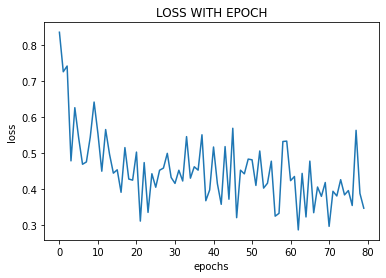

In [10]:
import matplotlib.pyplot as plt
plt.plot(epoch_list,loss_list)
plt.title("LOSS WITH EPOCH")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [11]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [12]:
evaluate_accuracy(train_iter,net)

0.8600666666666666

In [13]:
evaluate_accuracy(test_iter,net)

0.8395